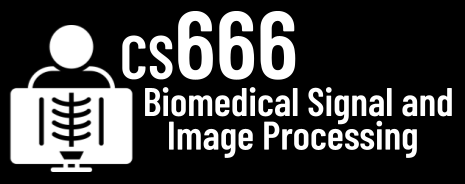
#Assignment 4

In [2]:
# NAME: Poornendu Pabbati

In [3]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: mahotas is being installed using the legacy 'setup.py install' method, because the '--no-binary' option was enabled for it and this currently disables local wheel building for projects that don't have a 'pyproject.toml' file. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussio

In [6]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [7]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [11]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

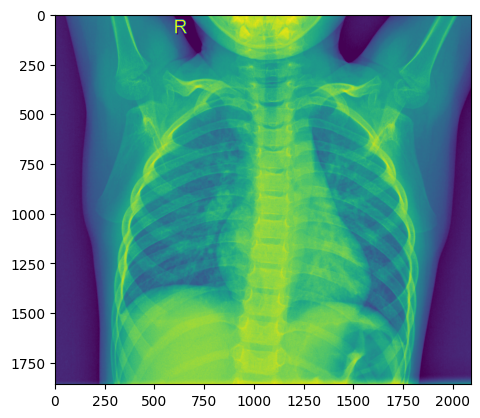

In [12]:
plt.imshow(img)

In [13]:
print(img.shape)

(1858, 2090)


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [14]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [15]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER : To store the image data for each folder a NumPy array of zeros with shape (no.of.files, 300, 300) .
# TODO: Operation 2) YOUR ANSWER : Reading , resizing all images to a fixed size of 300x300 and converting color images into grayscale .
# TODO: Operation 3) YOUR ANSWER : Using NumPy slicing ,Assigning the loaded and processed image data to the corresponding row in the data array .


In [16]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

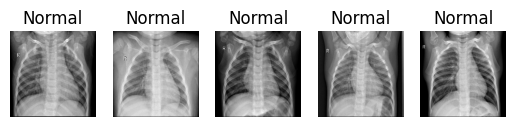

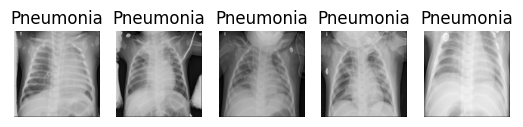

In [17]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt

# Get the first 5 normal and pneumonia images
normal_images = data[0][:5]
pneumonia_images = data[1][:5]

#  normal images
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(normal_images[i], cmap='gray')
    axs[i].set_title('Normal')
    axs[i].axis('off')
    
#  pneumonia images
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(pneumonia_images[i], cmap='gray')
    axs[i].set_title('Pneumonia')
    axs[i].axis('off')
plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [18]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [19]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [20]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
import numpy as np

# Create the y_train vector
y_train = np.concatenate([
    np.zeros(60),
    np.ones(60),
    np.full(60, 2)
], axis=0)


In [21]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [22]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
# Create the y_test vector
y_test = np.concatenate([
    np.zeros(TESTING_COUNT),
    np.ones(TESTING_COUNT),
    np.full(TESTING_COUNT, 2)
], axis=0)


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [23]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [24]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [25]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [26]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [27]:
# TODO: YOUR ANSWER
# Answer: Random Forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees. Each tree in a Random Forest is trained on a different random subset of the original dataset and at each node, the algorithm selects the best split from a random subset of features. This randomization and bagging technique helps to reduce overfitting and improve the generalization performance of the model.

In [28]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [29]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [30]:
# TODO: YOUR ANSWER
# ANS: Yes the classification accuracy is good and I am surprised .An accuracy score of 1.0 indicates that the model was able to correctly classify all the testing data. This is a very good classification accuracy, but we need to keep in mind that we only used a small dataset for training and testing. Maybe, the distribution of the classes in the dataset might have contributed to the high classification accuracy.

**Bonus:** Let's take a closer look! [33 Points]

In [31]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [32]:
# Load the remaining covid images
all_files = os.listdir(COVID_DIR)
remaining_covid_images = len(all_files) - TESTING_COUNT - TRAINING_COUNT
print((remaining_covid_images))
t_pos_i = 0
X_remaining_covid = np.zeros((remaining_covid_images, 300*300), dtype=np.float32)
for i in data[2][TESTING_COUNT + TRAINING_COUNT:len(all_files)]:
  i = i.ravel()
  i/= i.max()
  X_remaining_covid[t_pos_i] = i
  t_pos_i+=1
Y_remaining_covid = np.full(remaining_covid_images, 2)
clf.score(X_remaining_covid, Y_remaining_covid)




99


0.9696969696969697

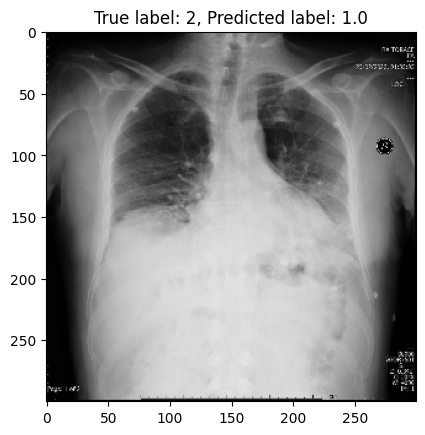

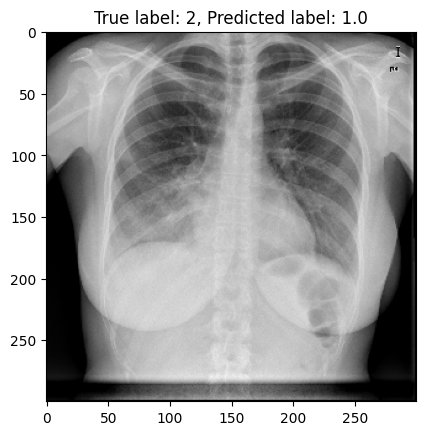

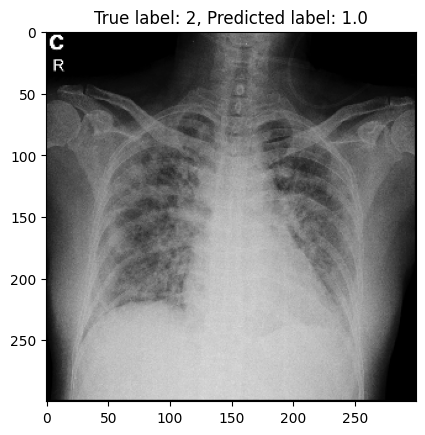

In [33]:
# Use the trained model to predict labels for the COVID-19 test set
y_pred = clf.predict(X_remaining_covid)
# Identify any misclassified images
misclassified_indices = np.where(y_pred != Y_remaining_covid )[0]

# Display the misclassified images
for index in misclassified_indices:
    plt.imshow(X_remaining_covid[index].reshape(300, 300), cmap='gray')
    plt.title(f"True label: {Y_remaining_covid[index]}, Predicted label: {y_pred[index]}")
    plt.show()

#Answer: The images were too blurry or noisy to be accurately classified, or that the classifier was not trained on enough COVID-19 images to learn the distinguishing features of the disease.

In [ ]:
# Collaborator : Venkat Naren Koya #Resources : Stack Overflow
#Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw